In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, validation_curve
from math import sqrt
% matplotlib inline

pd.options.display.max_columns = 999
df_s = pd.read_csv("energy_data_variables_final_normalized.csv", usecols = ['DOLLAREL', 'DRYRUSEM', 'USEWASHM', 'TOTROOMS', 'LGTOUTNUM', 'BEDROOMS', 'DRYRFUEL', 'TOTSQFT_EN', 'NUMCFAN', 'TVCOLOR', 'WINDOWS', 'NCOMBATH', 'LGTINNUM', 'ELWATER', 'FUELH2O', 'OTHROOMS', 'WHEATAGE', 'NUMFRIG', 'NHSLDMEM', 'AGERFRI2', 'LOCRFRI2', 'FUELHEAT', 'THERMAINAC', 'NUMFREEZ', 'KWH_M'])

In [2]:
df_s.shape

(5686, 25)

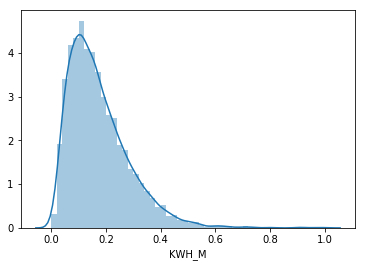

In [3]:
# Check Density Plot for Target Variable
ax = sns.distplot(df_s.KWH_M)
plt.show()

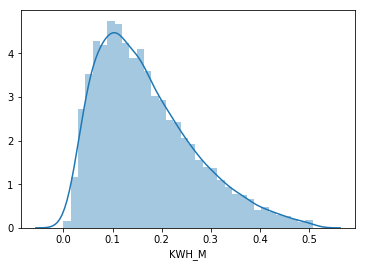

In [4]:
# Remove outliers that are more than 3 standard deviations from the mean 
df_s = df_s[np.abs(df_s["KWH_M"]-df_s["KWH_M"].mean())<=(3*df_s["KWH_M"].std())]

# Re-check distribution skewness for the target variable (KWH_M)
ax = sns.distplot(df_s.KWH_M)
plt.show()

In [5]:
df_s.shape

(5618, 25)

In [6]:
# Set X, Y Variables

X = df_s.values[:, 0:24]
Y = df_s.values[:, 24]

# Split data into training and testing sets
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

/Users/williamadams/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
forest = RandomForestRegressor()
parameters = {"n_estimators": [10, 20], "max_features": [4], 'max_depth': [None, 1, 2, 3]}
grid_obj = GridSearchCV(estimator=forest, param_grid=parameters, cv=5, scoring='neg_mean_squared_error')
grid_obj.fit(X, Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20], 'max_features': [4], 'max_depth': [None, 1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [8]:
# Calculate RMSE

forest= RandomForestRegressor(n_estimators=20, max_features=4)
shuffle = KFold(n_splits=3, shuffle=True, random_state=42)

mse_scores = cross_val_score(forest, X, Y, cv=shuffle, scoring = 'neg_mean_squared_error')
mse_scores1 = -mse_scores 
rmse_scores = np.sqrt(mse_scores1)

print ("The RMSE scores are %s" 
       % (rmse_scores))
print ("The mean of the RMSE scores is %f" 
       %(rmse_scores.mean()))


The RMSE scores are [0.04453587 0.04289316 0.04473821]
The mean of the RMSE scores is 0.044056


In [9]:
# Calculate MAE 
forest= RandomForestRegressor(n_estimators=20, max_features=4)
shuffle = KFold(n_splits=3, shuffle=True, random_state=42)

mae_scores = cross_val_score(forest, X, Y, cv=shuffle, scoring = "neg_mean_absolute_error")
mae_scores_ = -mae_scores

print ("The mean absolute error scores are %s" 
       % (mae_scores_))
print ("The mean of the mean absolute error scores is %f" 
       %(mae_scores_.mean()))

The mean absolute error scores are [0.03186469 0.03147335 0.03138291]
The mean of the mean absolute error scores is 0.031574


In [10]:
# Calculate VAR
from sklearn.metrics import mean_absolute_error

forest= RandomForestRegressor(n_estimators=20, max_features=4)
shuffle = KFold(n_splits=3, shuffle=True, random_state=42)

ev_scores = cross_val_score(forest, X, Y, cv=shuffle, scoring = "explained_variance")

print ("The explained variance scores are %s" 
       % (ev_scores))
print ("The mean of the explained variance scores is %f" 
       %(ev_scores.mean()))

The explained variance scores are [0.80846772 0.79214876 0.8046801 ]
The mean of the explained variance scores is 0.801766


In [11]:
# Calculate R2
from sklearn.metrics import mean_absolute_error

forest= RandomForestRegressor(n_estimators=20, max_features=4)
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)

r_scores = cross_val_score(forest, X, Y, cv=shuffle, scoring = "r2")

print ("The R2 scores are %s" 
       % (r_scores))
print ("The mean of the R2 scores is %f" 
       %(r_scores.mean()))

The R2 scores are [0.8068813  0.82197653 0.80004246 0.8353281  0.80987775 0.79650702
 0.80469205 0.82100995 0.79098608 0.84529371]
The mean of the R2 scores is 0.813259


Text(0.5,1,'Random Forest Regression')

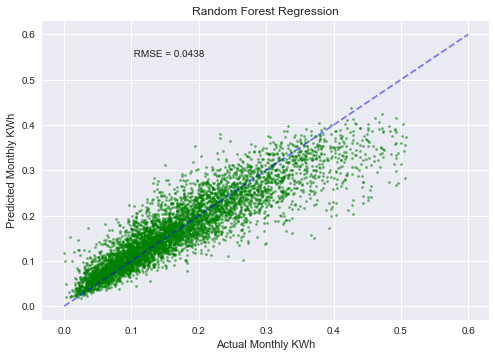

In [13]:
# Plot the Predict vs. Actual Values Using CrossValPredict
from sklearn.model_selection import cross_val_predict
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)
predicted_forest = cross_val_predict(forest, X, Y, cv=shuffle)

%matplotlib inline
plt.style.use('seaborn')
plt.scatter(Y, predicted_forest, s = 5, color = 'green', alpha = 0.6)
plt.plot([0,0.6], [0,0.6], "b--", color = "blue", alpha = 0.5)
plt.xlabel("Actual Monthly KWh")
plt.ylabel("Predicted Monthly KWh")
plt.text(0.1,0.55, ' RMSE = {}'.format(round(sqrt(mean_squared_error(Y, predicted_forest)), 4)))
plt.title('Random Forest Regression')